In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns
import sklearn
import datetime as dt

In [2]:
df = pd.read_json('logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
df.shape

(93142, 1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
df.set_index('login_time',inplace = True)
df['count'] = 1
df.sort_index(inplace=True)
login_times_agg = df.resample("15min").sum()

In [6]:
login_times_agg.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [7]:
login_times_agg['count'].sum()

93142

In [8]:
login_times_agg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


In [9]:
today = dt.datetime(2017, 10, 20)
today.weekday() 

4

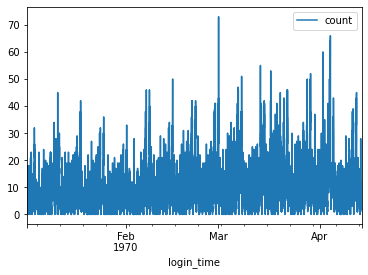

In [10]:
login_times_agg.plot()
plt.show()

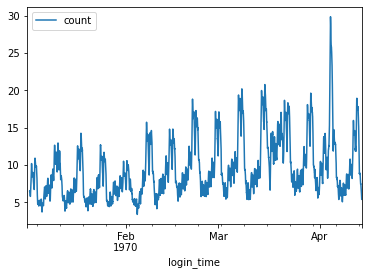

In [11]:
login_times_agg.rolling(window=80).mean().plot()
plt.show()

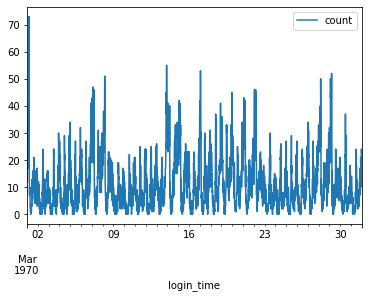

In [12]:
login_times_agg.loc['1970-03'].plot()
plt.show()

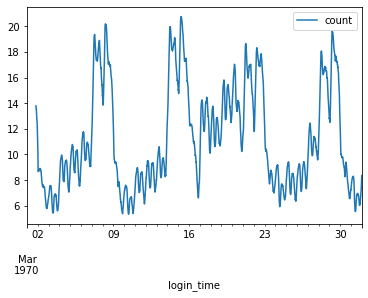

In [13]:
login_times_agg.loc['1970-03'].rolling(window=80).mean().plot()
plt.show()

In [14]:
dt.datetime(1970, 3, 1).weekday()

6

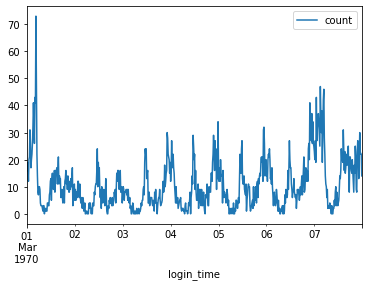

In [15]:
login_times_agg.loc['1970-03-01':'1970-03-07'].plot()
plt.show()

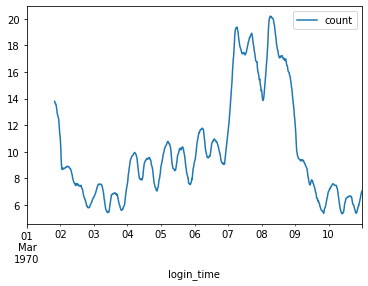

In [16]:
login_times_agg.loc['1970-03-01':'1970-03-10'].rolling(window=80).mean().plot()
plt.show()

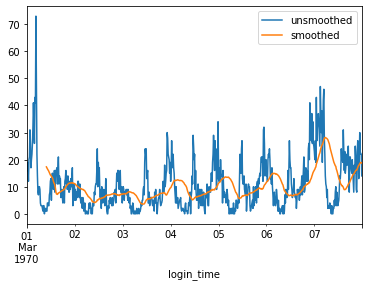

In [17]:
unsmoothed = login_times_agg['count']['1970-03-01':'1970-03-07']
smoothed = unsmoothed.rolling(window=40).mean()
one_week = pd.DataFrame({'unsmoothed':unsmoothed, 'smoothed':smoothed})
one_week.plot()
plt.show()

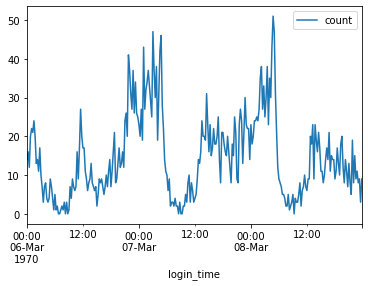

In [18]:
login_times_agg.loc['1970-03-06':'1970-03-08'].plot()
plt.show()

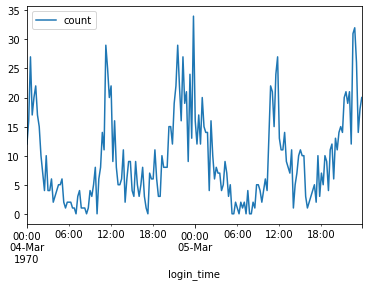

In [19]:
login_times_agg.loc['1970-03-04':'1970-03-05'].plot()
plt.show()

In [20]:
date = dt.datetime(1970, 3, 1)
date.weekday()

6

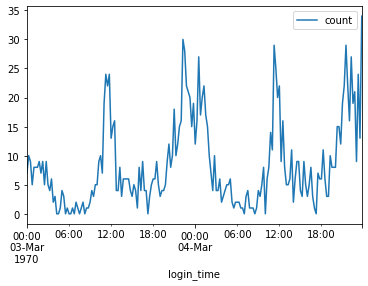

In [21]:
login_times_agg.loc['1970-03-03':'1970-03-04' ].plot()
plt.show()

In [26]:
# Generally busiest on weekends and busiest around mignight and noon

Experiments and Metics Design

The key measure I would use to determine the success in encouraging driving partners to serve both cities is if we fail to
reject the null hypothesis then the data would seem consistent with the claim that the proportions of drivers of Gotham
and Metropolis are equivalent. The way to measure that success would be to measure the ratios for the following conditions before and after the implementation of an experiment.

Before the experiment:

    Gotham Night Drivers/ All Drivers / Period of time

    Gotham Day Drivers/ All Drivers / Period of time

    Metropolis Night Drivers/ All Drivers / Period of time

    Metropolis Day Drivers/ All Drivers / Period of time

After the experiment:

    Gotham Night Drivers/ All Drivers / Period of time

    Gotham Day Drivers/ All Drivers / Period of time

    Metropolis Night Drivers/ All Drivers / Period of time
    
    Metropolis Day Drivers/ All Drivers / Period of time

Once these ratios have been determined, we would use a z-test to determine whether the experiment had a statistically significant change in each of the proportions.

In [22]:
# Part 3 Predictive Modeling

with open('ultimate_data_challenge.json') as f:
    data = json.load(f)
df = pd.DataFrame(data)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [24]:
df.last_trip_date[0]

'2014-06-17'

In [25]:
df.last_trip_date = pd.to_datetime(df.last_trip_date)
df.signup_date = pd.to_datetime(df.signup_date)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [27]:
df['last_trip_date'].describe()

C:\Users\stern\AppData\Local\Temp\ipykernel_10128\632557333.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['last_trip_date'].describe()


count                   50000
unique                    182
top       2014-06-29 00:00:00
freq                     2036
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object

In [28]:
fraction_retained = (df.last_trip_date >= '2014-06-01').sum() / (df.last_trip_date >= '2014-06-01').count()
fraction_retained

0.37608

In [30]:
# Creating a was retained column

df['was_retained'] = (df.last_trip_date >= '2014-06-01')*1
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,was_retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


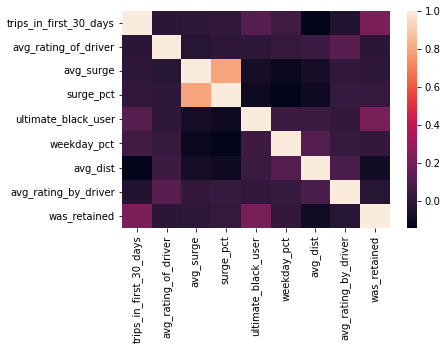

In [31]:
fig = plt.figure()
ax = plt.subplot(111)
corr = df.corr()
ax = sns.heatmap(corr)
plt.show()

In [32]:
corr['was_retained'].sort_values(ascending=False)

was_retained              1.000000
trips_in_first_30_days    0.210463
ultimate_black_user       0.205002
surge_pct                 0.011797
weekday_pct               0.009693
avg_surge                -0.003333
avg_rating_of_driver     -0.011653
avg_rating_by_driver     -0.026791
avg_dist                 -0.092780
Name: was_retained, dtype: float64

In [33]:
df.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [34]:
df.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [35]:
df.phone.fillna('Other', inplace=True)
df.phone.value_counts()

iPhone     34582
Android    15022
Other        396
Name: phone, dtype: int64

In [36]:
cities_dummy = pd.get_dummies(df['city'])
phones_dummy = pd.get_dummies(df['phone'])

In [37]:
df = df.join(cities_dummy).join(phones_dummy)

In [38]:
df.drop(['city','phone'], axis = 1, inplace = True)

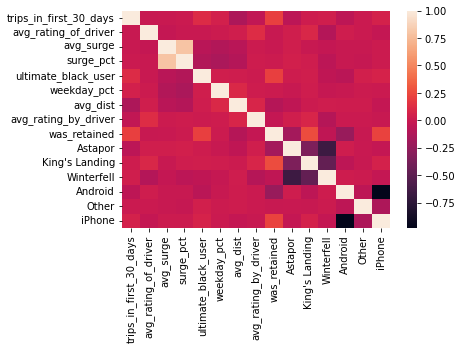

In [39]:
fig = plt.figure()
ax = plt.subplot(111)
corr = df.corr()
ax = sns.heatmap(corr)
plt.show()

In [40]:
corr['was_retained'].sort_values(ascending=False)

was_retained              1.000000
King's Landing            0.262284
iPhone                    0.225244
trips_in_first_30_days    0.210463
ultimate_black_user       0.205002
surge_pct                 0.011797
weekday_pct               0.009693
avg_surge                -0.003333
Other                    -0.007419
avg_rating_of_driver     -0.011653
avg_rating_by_driver     -0.026791
Winterfell               -0.046611
avg_dist                 -0.092780
Astapor                  -0.174655
Android                  -0.225464
Name: was_retained, dtype: float64

In [41]:
df['signup_date'] = df['signup_date'].dt.strftime('%Y%m%d').astype(int) - 20140100

In [42]:
df['signup_date'].corr(df['was_retained'])

-0.020210618434848227

In [45]:
df['ultimate_black_user'] = df['ultimate_black_user']*1

In [46]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, precision_recall_curve
import time

In [47]:
with open('ultimate_data_challenge.json') as f:
    data = json.load(f)
df = pd.DataFrame(data)

df['was_retained'] = (df.last_trip_date >= '2014-06-01')*1
df.last_trip_date = pd.to_datetime(df.last_trip_date)
df.signup_date = pd.to_datetime(df.signup_date)
df['signup_date'] = df['signup_date'].dt.strftime('%Y%m%d').astype(int) - 20140100
df['last_trip_date'] = (df['last_trip_date'] - min(df['last_trip_date'])).dt.days + 1 

In [48]:
# Preprocessing Data
np.random.seed(42)

df.phone.fillna('Other', inplace=True)
categorical_features = ['city', 'phone']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder())
]
)

numeric_features = [column for column in df.columns.tolist() if column not in categorical_features and
                    column not in ['last_trip_date', 'was_retained']]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
]
)

In [49]:
X = df.drop(['was_retained', 'last_trip_date'], axis=1)
y = df['was_retained']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [50]:
metrics = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'AUC', 'Time to Train'], 
                       columns=['Dummy Model', 'Logistic Regression', 'K Nearest Neighbors', 'Support Vector Machine', 
                                'Decision Tree', 'Random Forest', 'Naive Bayes'])


In [58]:
# Steps 5 - 8:
def train_and_score_model(model_name, estimator, param_grid=None, cv=5, iid=False):
    
    #### Step 5: Instantiate the CV Object
    
    if model_name in ['Dummy Model', 'Naive Bayes']:
        cv = estimator
    elif model_name == 'Logistic Regression':
        cv = GridSearchCV(estimator, param_grid, cv=cv)
    else: 
        cv = RandomizedSearchCV(estimator, param_grid, cv=cv, random_state=None)

    #### Step 6: Fit on Training
    t0 = time.time()
    cv.fit(X_train, y_train)
    ttt = time.time() - t0 # ttt stands for "time to train"
    print("It takes %.3f seconds for %s fitting" % (ttt, model_name))
    metrics.loc['Time to Train', model_name] = ttt

    #### Step 7: Predict on Test

    y_pred = cv.predict(X_test)

    #### Step 8: Scoring
    ##### Accuracy

    print("Accuracy with " + model_name + "on the testing set is: %.3f" % cv.score(X_test, y_test))

    metrics.loc['accuracy', model_name] = accuracy_score(y_pred=y_pred, y_true=y_test)
    metrics.loc['precision', model_name] = precision_score(y_pred=y_pred, y_true=y_test)
    metrics.loc['recall', model_name] = recall_score(y_pred=y_pred, y_true=y_test)
    
    if model_name != 'Support Vector Machine':
        y_pred_prob = cv.predict_proba(X_test)[:,1]
        metrics.loc['AUC', model_name] = roc_auc_score(y_test, y_pred_prob)

    print(Conf_Matrix(confusion_matrix(y_test, y_pred)))
    print(classification_report(y_test, y_pred))

    if model_name != 'Support Vector Machine':
        # ROC Curve
        fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
        plt.plot([0,1], [0,1], 'k--')
        plt.plot(fpr, tpr, label=model_name)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('%s ROC Curve' % model_name)
        plt.show()

    return cv

In [59]:
def Conf_Matrix(CM, labels=['Not Retained', 'Retained']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name = 'TRUE'
    df.columns.name = 'PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

In [63]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint


# Step 3: Instantiate the model/estimator
classifier_dm = DummyClassifier(strategy="most_frequent", random_state=0)
classifier_lr = LogisticRegression(solver='liblinear', random_state=0)
classifier_knn = KNeighborsClassifier()
classifier_svm = SVC(random_state=0)
#classifier_dt = DecisionTreeClassifier(random_state=0)
classifier_rf = RandomForestClassifier(random_state=0)
classifier_nb = GaussianNB()

classifiers = [classifier_dm, classifier_lr, classifier_knn, classifier_svm, classifier_rf, classifier_nb]

# Step 4: Specify the Hyperparameter Space
param_grid_dm = None
param_grid_lr = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__C': np.logspace(-5, 8, 15),
    'classifier__penalty': ['l1', 'l2']
}
param_grid_knn = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__n_neighbors': np.arange(1,20)
}
param_grid_svm = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [1, 0.1, 0.01]
}
#param_grid_dt = {
#                'preprocessor__num__imputer__strategy': ['mean', 'median'],
#                'classifier__max_depth': [3, 10, 20, None],
#                'classifier__max_features': randint(1, 9),
#                'classifier__min_samples_leaf': randint(1, 9),
#                'classifier__min_samples_split': randint(2, 9),
#                'classifier__criterion': ["gini", "entropy"]
#}
param_grid_rf = {
                 'preprocessor__num__imputer__strategy': ['mean', 'median'], 
                 'classifier__n_estimators': [50, 100],
                 'classifier__criterion': ["gini", "entropy"],
                 'classifier__max_depth': [3, 10, 20, None],
                 'classifier__min_samples_leaf': randint(1, 9),
                 'classifier__min_samples_split': randint(2, 9),
                 'classifier__max_features': randint(1, 9)
}
param_grid_nb = None

param_grids = [param_grid_dm, param_grid_lr, param_grid_knn, param_grid_svm, param_grid_rf, param_grid_nb]

model_names = ['Dummy Model', 'Logistic Regression', 'K Nearest Neighbors', 'Support Vector Machine', 'Random Forest', 'Naive Bayes']
cv_names = ['dm_cv', 'lr_cv', 'knn_cv', 'svm_cv', 'rf_cv', 'nb_cv']
cvs = [None, 5, 5, 5, 5, 5]

It takes 0.205 seconds for Dummy Model fitting
Accuracy with Dummy Modelon the testing set is: 0.624
PREDICTION    Not Retained  Retained  Total
TRUE                                       
Not Retained          9359         0   9359
Retained              5641         0   5641
Total                15000         0  15000


C:\Users\stern\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\stern\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\stern\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\stern\anaconda3\lib\site-packages\sklearn\metrics\_classification.p

              precision    recall  f1-score   support

           0       0.62      1.00      0.77      9359
           1       0.00      0.00      0.00      5641

    accuracy                           0.62     15000
   macro avg       0.31      0.50      0.38     15000
weighted avg       0.39      0.62      0.48     15000



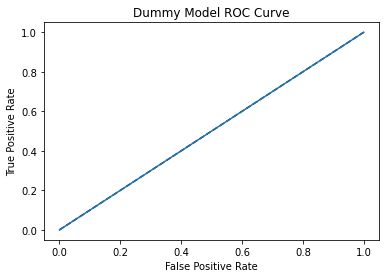

It takes 72.783 seconds for Logistic Regression fitting
Accuracy with Logistic Regressionon the testing set is: 0.716
PREDICTION    Not Retained  Retained  Total
TRUE                                       
Not Retained          7984      1375   9359
Retained              2880      2761   5641
Total                10864      4136  15000
              precision    recall  f1-score   support

           0       0.73      0.85      0.79      9359
           1       0.67      0.49      0.56      5641

    accuracy                           0.72     15000
   macro avg       0.70      0.67      0.68     15000
weighted avg       0.71      0.72      0.71     15000



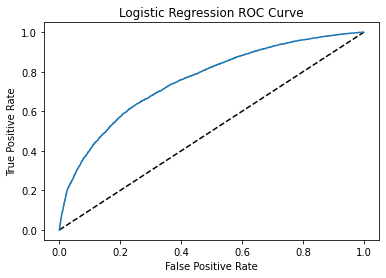

It takes 123.474 seconds for K Nearest Neighbors fitting
Accuracy with K Nearest Neighborson the testing set is: 0.753
PREDICTION    Not Retained  Retained  Total
TRUE                                       
Not Retained          7779      1580   9359
Retained              2131      3510   5641
Total                 9910      5090  15000
              precision    recall  f1-score   support

           0       0.78      0.83      0.81      9359
           1       0.69      0.62      0.65      5641

    accuracy                           0.75     15000
   macro avg       0.74      0.73      0.73     15000
weighted avg       0.75      0.75      0.75     15000



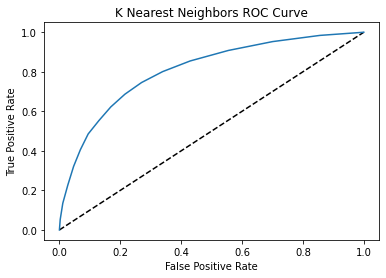

It takes 7180.860 seconds for Support Vector Machine fitting
Accuracy with Support Vector Machineon the testing set is: 0.768
PREDICTION    Not Retained  Retained  Total
TRUE                                       
Not Retained          8161      1198   9359
Retained              2289      3352   5641
Total                10450      4550  15000
              precision    recall  f1-score   support

           0       0.78      0.87      0.82      9359
           1       0.74      0.59      0.66      5641

    accuracy                           0.77     15000
   macro avg       0.76      0.73      0.74     15000
weighted avg       0.76      0.77      0.76     15000

It takes 158.685 seconds for Random Forest fitting
Accuracy with Random Foreston the testing set is: 0.778
PREDICTION    Not Retained  Retained  Total
TRUE                                       
Not Retained          8007      1352   9359
Retained              1980      3661   5641
Total                 9987      5013  15000


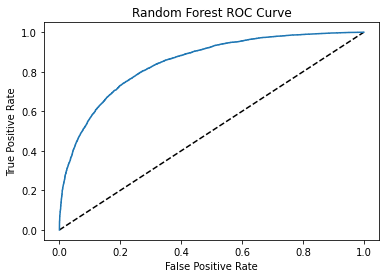

It takes 0.208 seconds for Naive Bayes fitting
Accuracy with Naive Bayeson the testing set is: 0.692
PREDICTION    Not Retained  Retained  Total
TRUE                                       
Not Retained          6419      2940   9359
Retained              1678      3963   5641
Total                 8097      6903  15000
              precision    recall  f1-score   support

           0       0.79      0.69      0.74      9359
           1       0.57      0.70      0.63      5641

    accuracy                           0.69     15000
   macro avg       0.68      0.69      0.68     15000
weighted avg       0.71      0.69      0.70     15000



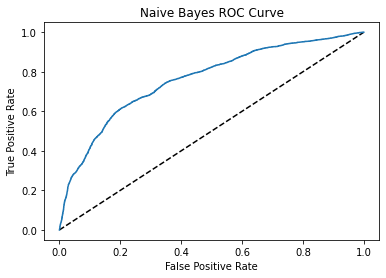

In [65]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                 ('classifier', classifier_dm)])
dm_cv = train_and_score_model('Dummy Model', pipeline, param_grid_dm)


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                    ('classifier', classifier_lr)])
lr_cv = train_and_score_model('Logistic Regression', pipeline, param_grid_lr)


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', classifier_knn)])
knn_cv = train_and_score_model('K Nearest Neighbors', pipeline, param_grid_knn)


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', classifier_svm)])
svm_cv = train_and_score_model('Support Vector Machine', pipeline, param_grid_svm)


#pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                     ('classifier', classifier_dt)])
#dt_cv = train_and_score_model('Decision Tree', pipeline, param_grid_dt)


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', classifier_rf)])
rf_cv = train_and_score_model('Random Forest', pipeline, param_grid_rf)


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', classifier_nb)])
nb_cv = train_and_score_model('Naive Bayes', pipeline, param_grid_nb)

In [66]:
from pandas.plotting import table
metrics.astype(float).round(3)
actual_metrics = metrics.astype(float).round(3).loc[['accuracy', 'precision', 'recall', 'AUC']]*100
actual_metrics

,Dummy Model,Logistic Regression,K Nearest Neighbors,Support Vector Machine,Decision Tree,Random Forest,Naive Bayes
accuracy,62.4,71.6,75.3,76.8,NaN,77.8,69.2
precision,0.0,66.8,69.0,73.7,NaN,73.0,57.4
recall,0.0,48.9,62.2,59.4,NaN,64.9,70.3
AUC,50.0,75.7,80.7,NaN,NaN,84.8,76.1


The Random Forest Model is the best performing model in regards to accuracy and auc score. Due to the fact that the performance is also not intensive, I will use the RF model.

In [67]:
rf_cv.best_params_

{'classifier__criterion': 'entropy',
 'classifier__max_depth': 10,
 'classifier__max_features': 6,
 'classifier__min_samples_leaf': 6,
 'classifier__min_samples_split': 4,
 'classifier__n_estimators': 50,
 'preprocessor__num__imputer__strategy': 'median'}

In [68]:
rf_model = rf_cv.best_estimator_

In [69]:
with open('ultimate_data_challenge.json') as f:
    data = json.load(f)
df = pd.DataFrame(data)

df['was_retained'] = (df.last_trip_date >= '2014-06-01')*1
df.last_trip_date = pd.to_datetime(df.last_trip_date)
df.signup_date = pd.to_datetime(df.signup_date)
df['signup_date'] = df['signup_date'].dt.strftime('%Y%m%d').astype(int) - 20140100
df['last_trip_date'] = (df['last_trip_date'] - min(df['last_trip_date'])).dt.days + 1 

df.phone.fillna('Other', inplace=True)
df['city'] = df['city'].astype('category')
df['phone'] = df['phone'].astype('category')
df = pd.get_dummies(df)

In [70]:
df.avg_rating_by_driver.fillna(df.avg_rating_by_driver.mean(),inplace=True)
df.avg_rating_of_driver.fillna(df.avg_rating_of_driver.mean(),inplace=True)

In [71]:
X = df.drop(['was_retained', 'last_trip_date'], axis=1)
y = df['was_retained']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [72]:
# Step 3: Instantiate the model/estimator
classifier_rf = RandomForestClassifier(random_state=42, criterion='entropy', max_depth=10, 
                                       max_features=6, min_samples_leaf=6, min_samples_split=4, n_estimators=50)


It takes 2.599 seconds for Random Forest fitting
Accuracy with Random Foreston the testing set is: 0.783
ROC AUC score is: 0.850
PREDICTION    Not Retained  Retained  Total
TRUE                                       
Not Retained          8064      1295   9359
Retained              1962      3679   5641
Total                10026      4974  15000
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      9359
           1       0.74      0.65      0.69      5641

    accuracy                           0.78     15000
   macro avg       0.77      0.76      0.76     15000
weighted avg       0.78      0.78      0.78     15000



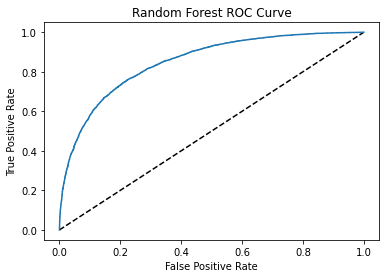

In [73]:
#### Step 6: Fit on Training
t0 = time.time()
classifier_rf.fit(X_train, y_train)
ttt = time.time() - t0 # ttt stands for "time to train"
print("It takes %.3f seconds for %s fitting" % (ttt, 'Random Forest'))
#### Step 7: Predict on Test
y_pred = classifier_rf.predict(X_test)
#### Step 8: Scoring
##### Accuracy
print("Accuracy with " + 'Random Forest' + "on the testing set is: %.3f" % classifier_rf.score(X_test, y_test))    
y_pred_prob = classifier_rf.predict_proba(X_test)[:,1]
print("ROC AUC score is: %.3f" %roc_auc_score(y_test, y_pred_prob))
print(Conf_Matrix(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred))
# ROC Curve
fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('%s ROC Curve' % 'Random Forest')
plt.show()

In [74]:
pd.DataFrame(classifier_rf.feature_importances_, 
             index = X_train.columns, columns = ['importance']).sort_values('importance', ascending=False)

,importance
avg_rating_by_driver,0.205228
surge_pct,0.131644
city_King's Landing,0.119117
weekday_pct,0.096063
avg_dist,0.065231
trips_in_first_30_days,0.061598
avg_surge,0.060978
ultimate_black_user,0.057054
phone_iPhone,0.045593
phone_Android,0.038534
